In [1]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.4.5 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/112.6 GB disk)


In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# Train the model
results = model.train(data="/content/drive/MyDrive/GooseBot/goosedataset_final/goosedataset_final/data.yaml", epochs=100, imgsz=640)

Ultralytics 8.4.5 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/GooseBot/goosedataset_final/goosedataset_final/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_

In [4]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list containing mAP50-95 for each category

Ultralytics 8.4.5 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 101 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.5 ms, read: 31.2±10.6 MB/s, size: 47.5 KB)
val: Scanning /content/drive/MyDrive/GooseBot/goosedataset_final/goosedataset_final/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2/2 762.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.2it/s 0.1s
                   all          2         43      0.725      0.336      0.398      0.232
                  duck          1         10      0.828        0.9        0.9      0.582
        l_intersection          1          1          1          0          0          0
                 mouse          1          1          1          0          0          0
               redline          1          6      0.746      0.492      0.797      0.459
    

array([    0.58156,           0,           0,     0.45892,     0.23217,     0.23217,     0.23803,      0.1145])

In [7]:
model.predict('/content/drive/MyDrive/GooseBot/goosedataset_final/goosedataset_final/test/images', save=True)


image 1/2 /content/drive/MyDrive/GooseBot/goosedataset_final/goosedataset_final/test/images/5_jpg.rf.20da2395b5dca3ae3ea1ecffe8bf9da8.jpg: 512x640 1 whiteline, 9.5ms
image 2/2 /content/drive/MyDrive/GooseBot/goosedataset_final/goosedataset_final/test/images/9_jpg.rf.0451c45b5a4e79baa0f84fbc9fdc5510.jpg: 480x640 3 redlines, 5 whitelines, 1 yellowline, 8.7ms
Speed: 2.3ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'duck', 1: 'l_intersection', 2: 'mouse', 3: 'redline', 4: 'stopsign', 5: 't_intersection', 6: 'whiteline', 7: 'yellowline'}
 obb: None
 orig_img: array([[[203, 196, 179],
         [203, 196, 179],
         [205, 198, 181],
         ...,
         [205, 206, 186],
         [205, 206, 186],
         [205, 206, 186]],
 
        [[204, 197, 180],
         [204, 197, 180],
         [206, 199, 182],
         ...,
         [206, 207, 187],
         [206, 207, 187],
         [206, 207, 187]],
 
        [[205, 198, 181],
         [206, 199, 182],
         [207, 200, 183],
         ...,
         [208, 209, 189],
         [208, 209, 189],
         [208, 209, 189]],
 
        ...,
 
        [[ 59,  44,  41],
         [ 64,  49,  46],
         [ 72,  57,  54],
         ...,
         [ 52,  38,  32],
         [ 52,  38,  32],
         [ 51,  37,  31]]

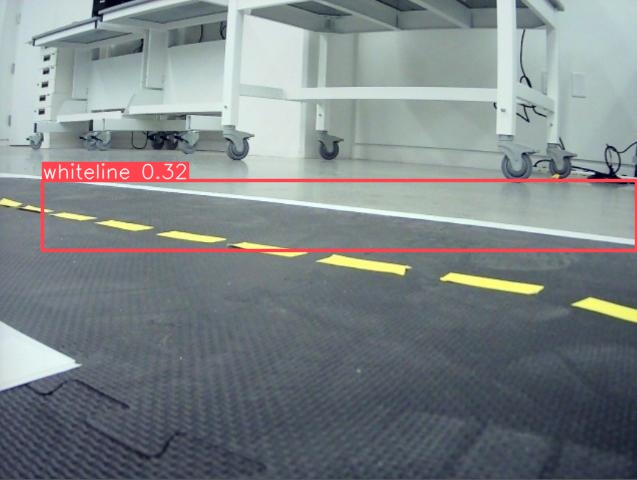

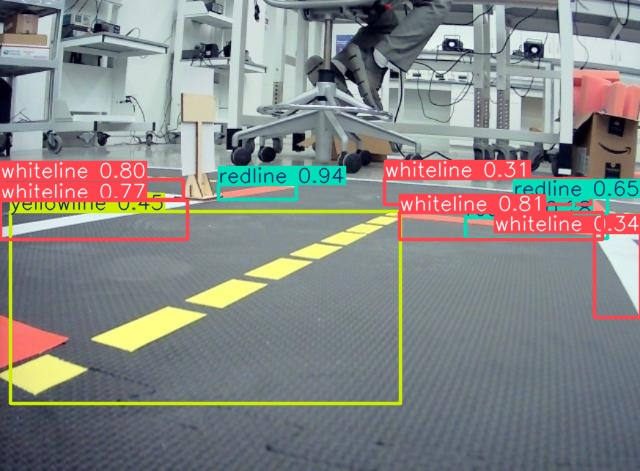

In [8]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg') + glob.glob('/content/runs/detect/predict/*.png'):
    display(Image(filename=image_path))

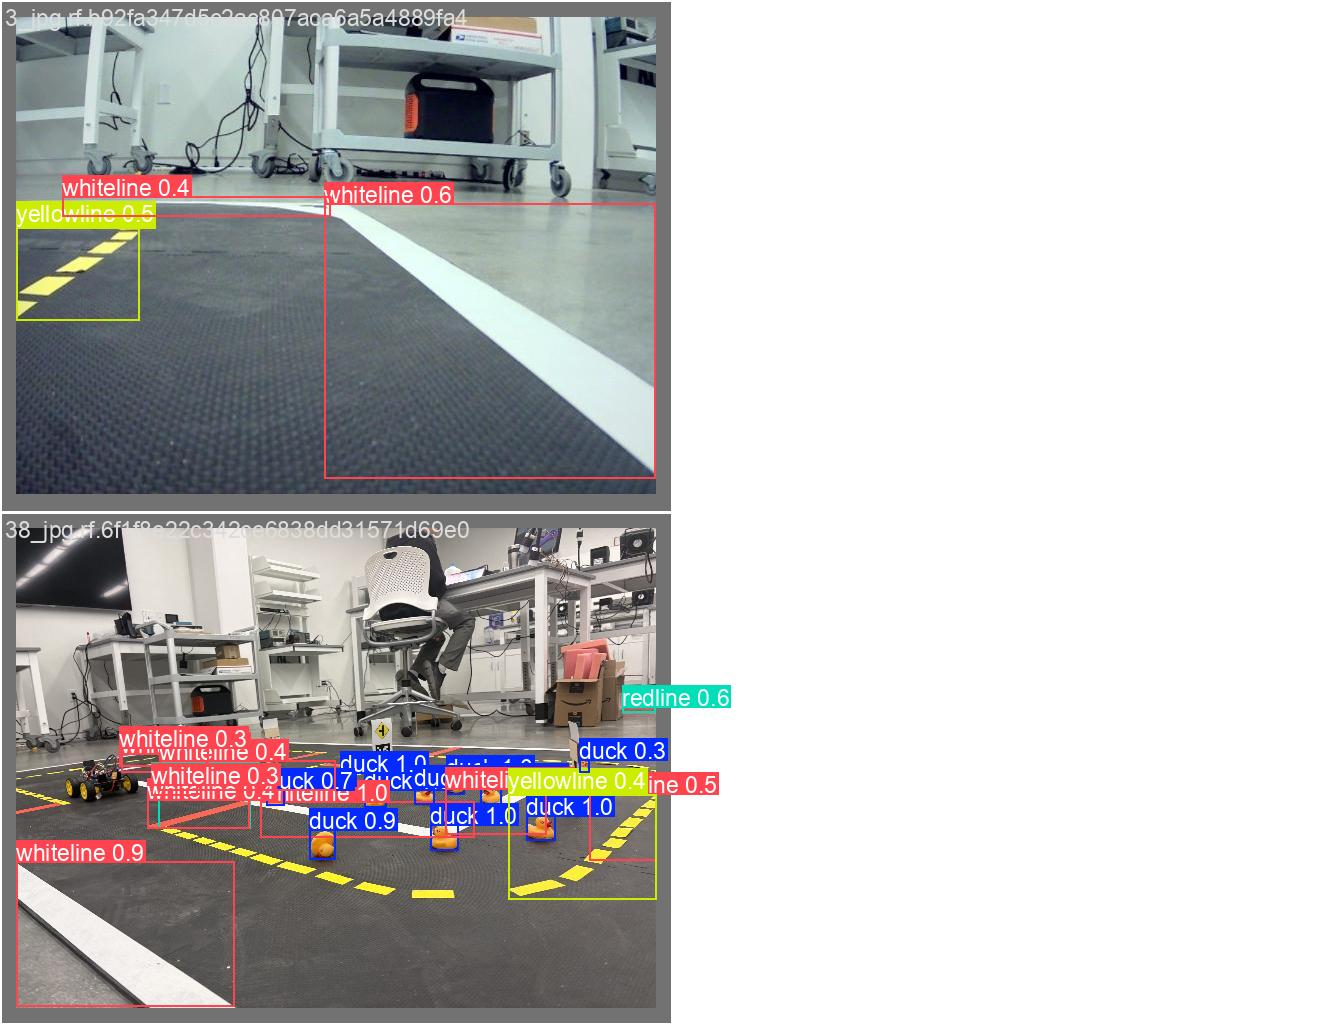

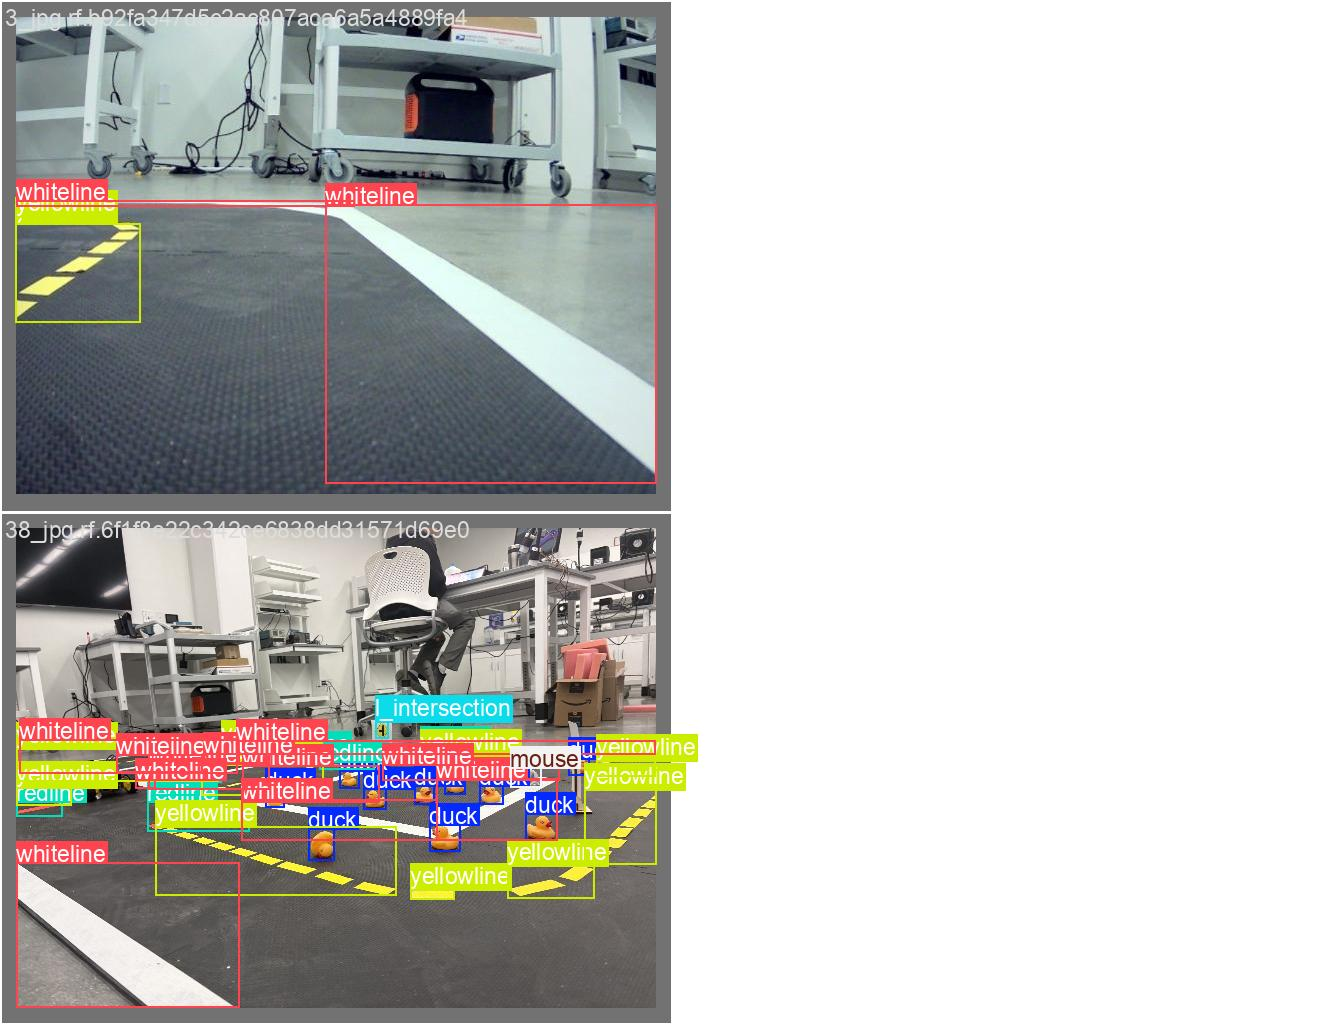

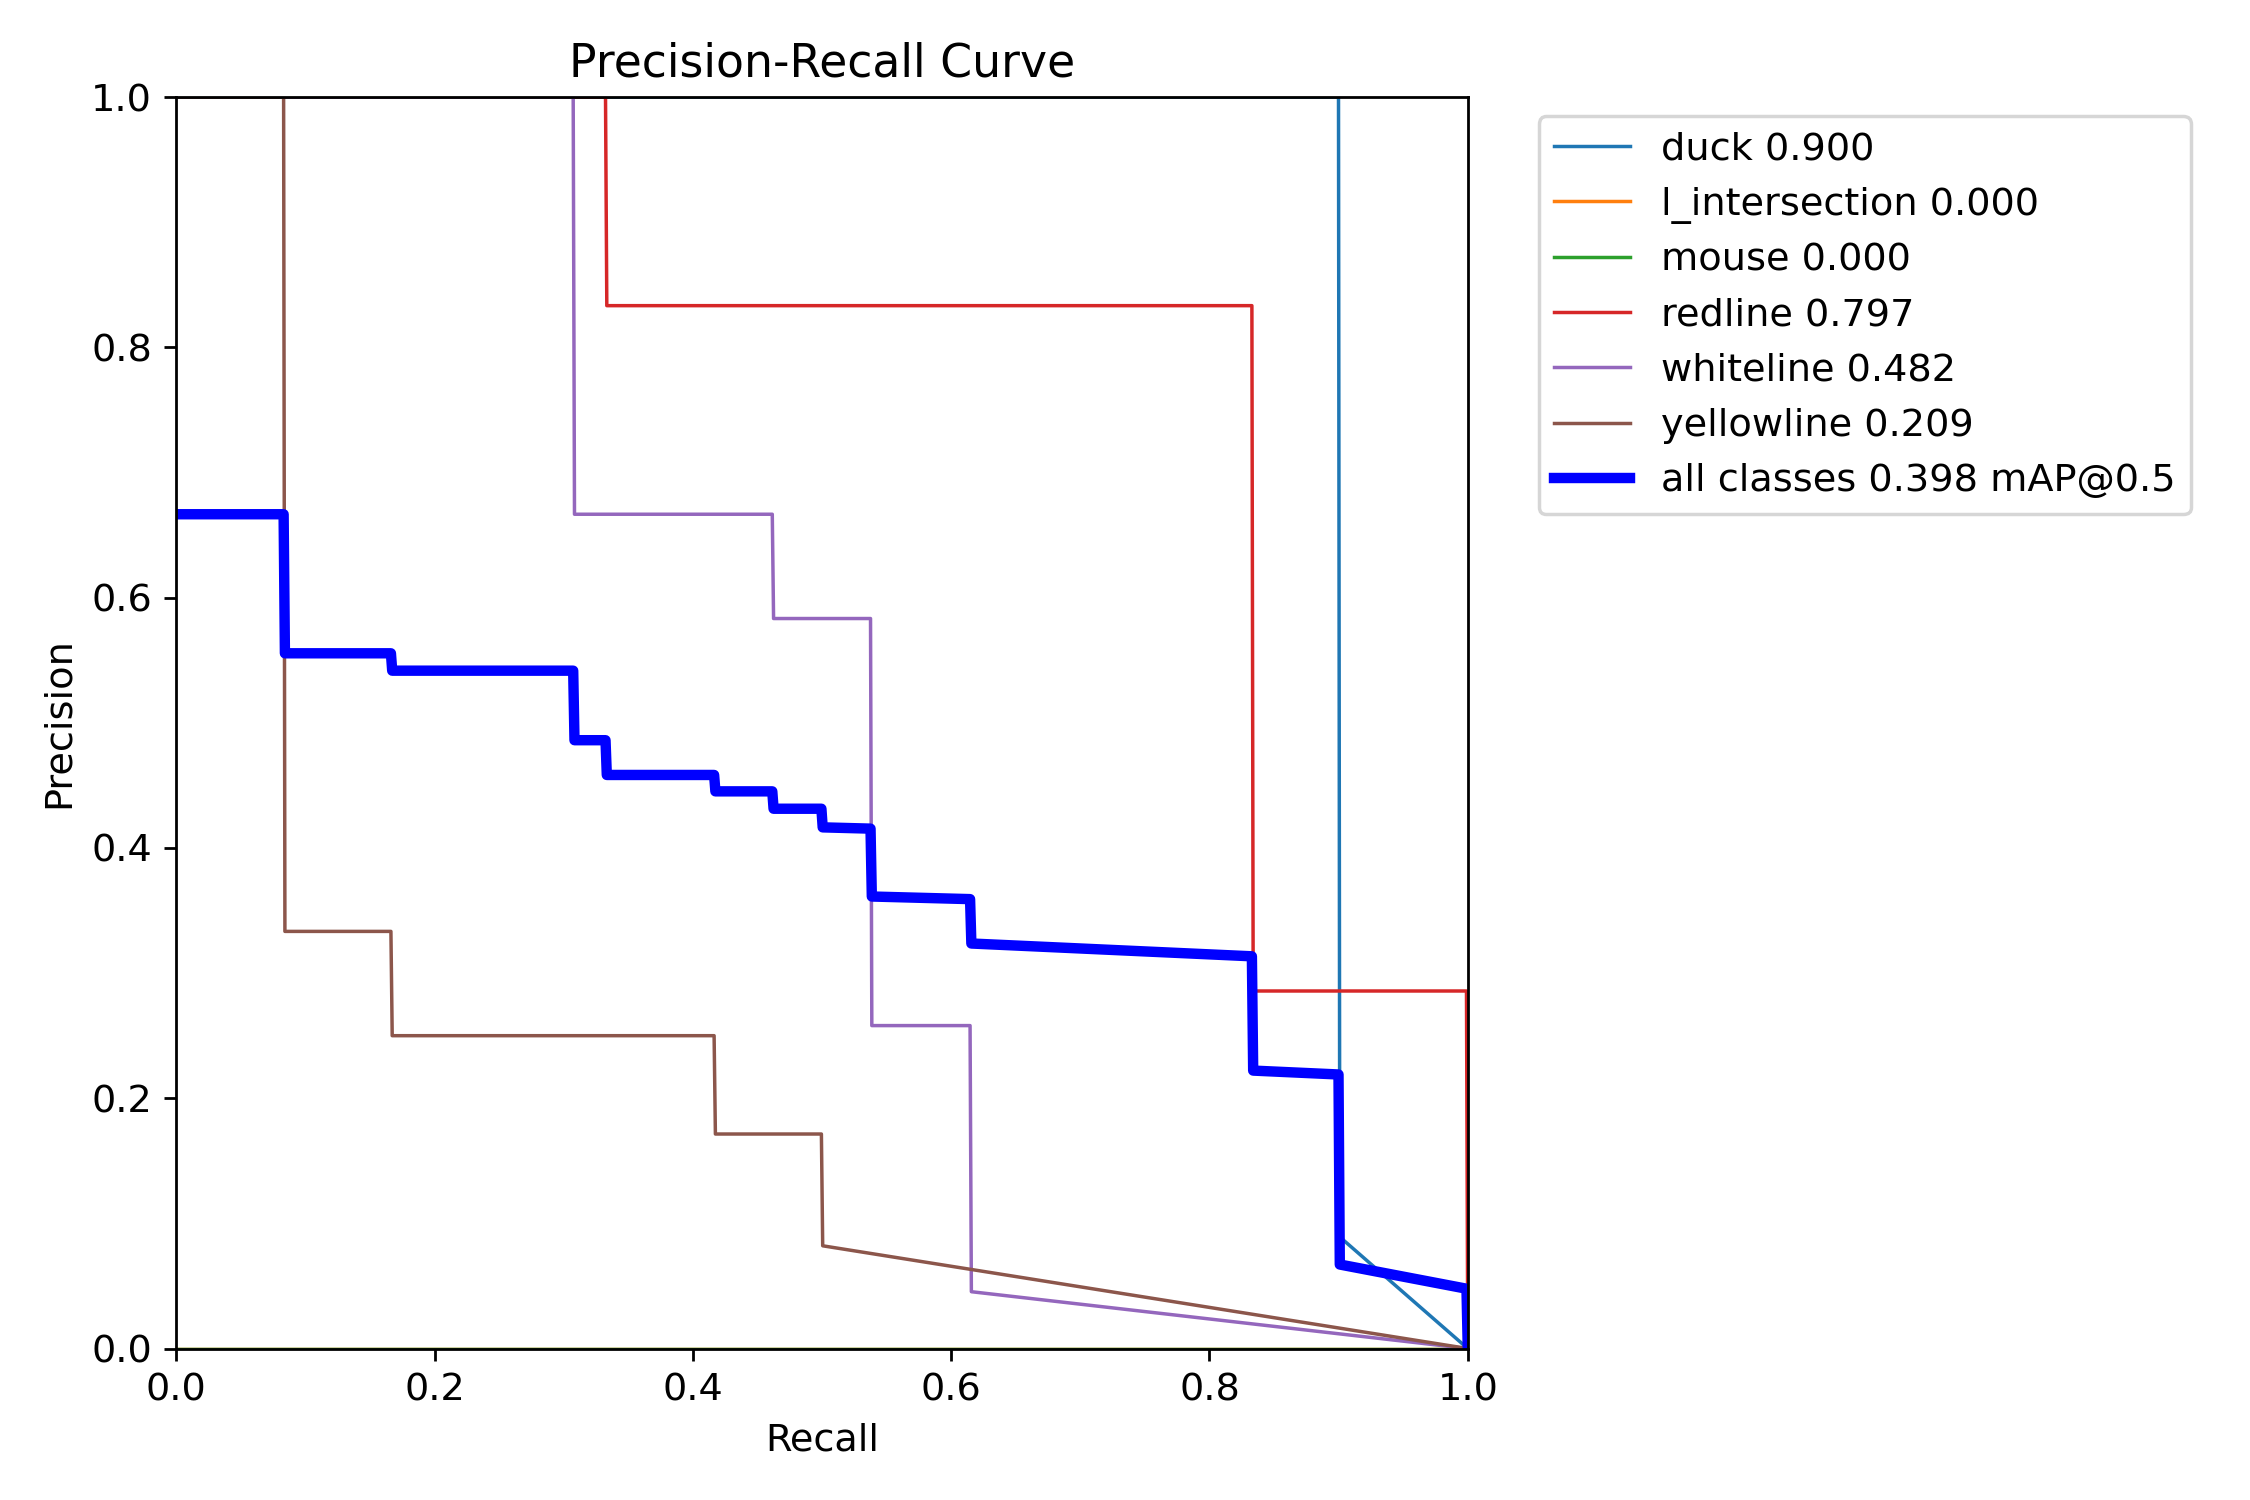

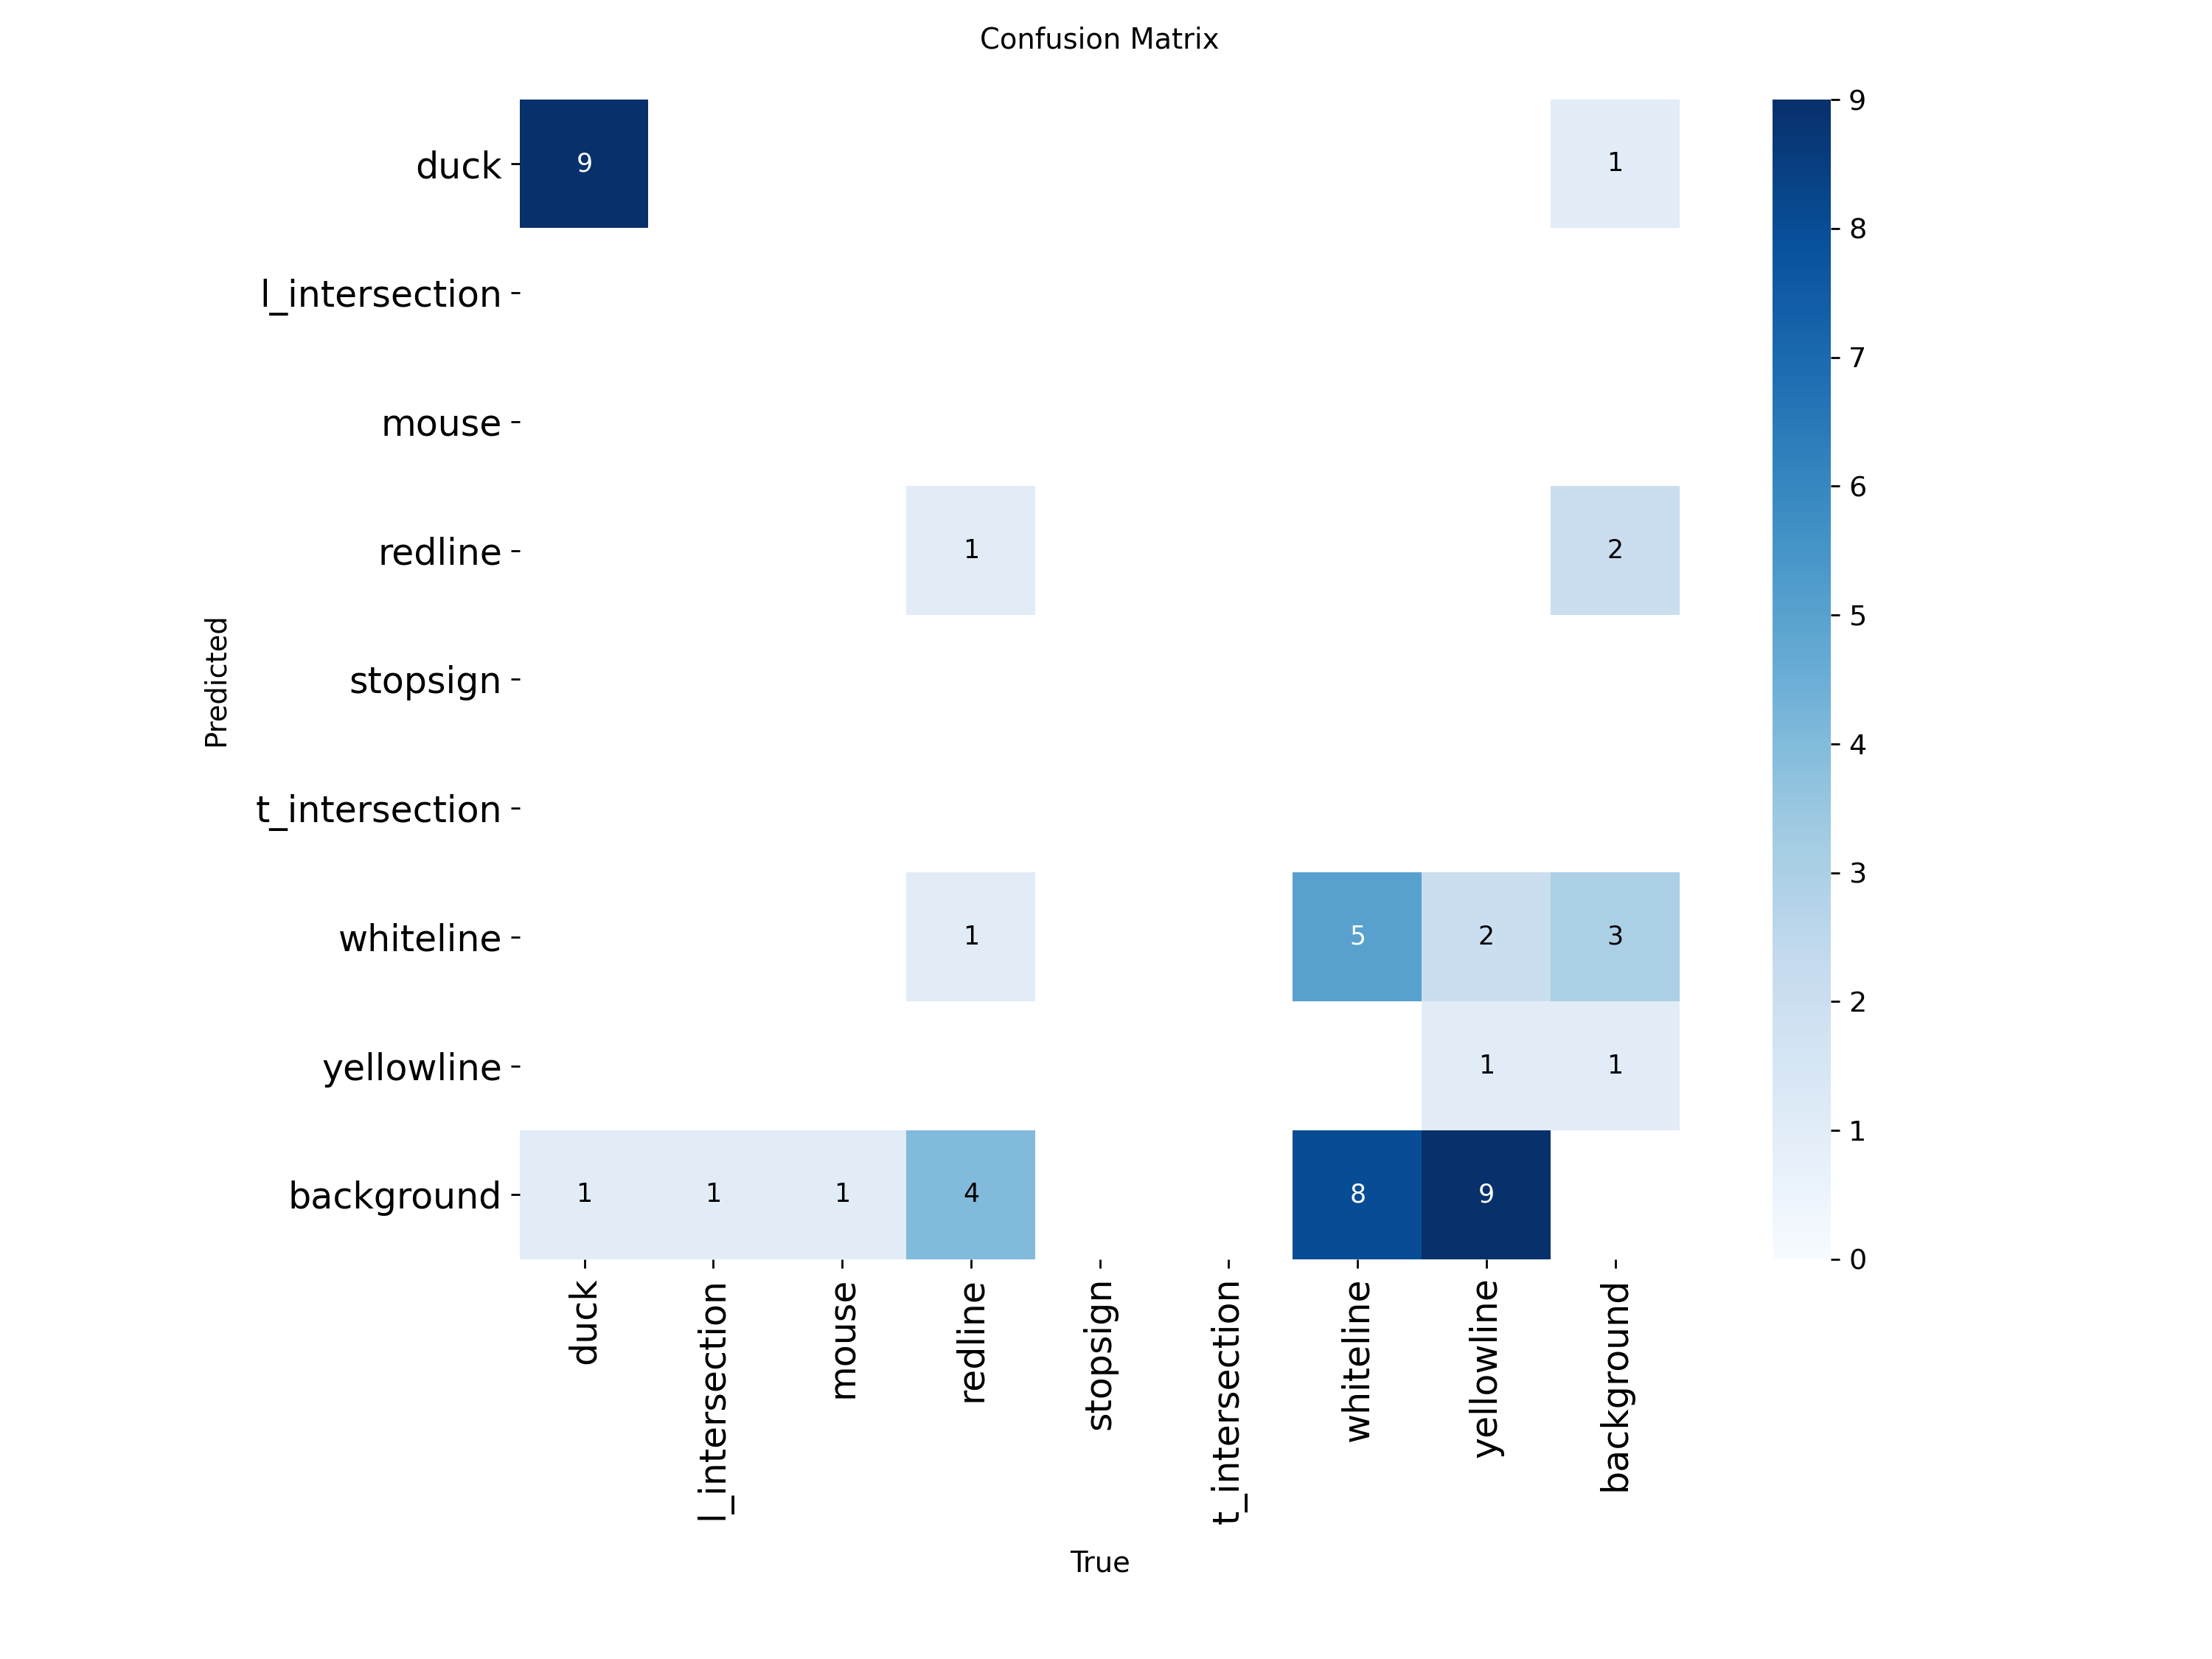

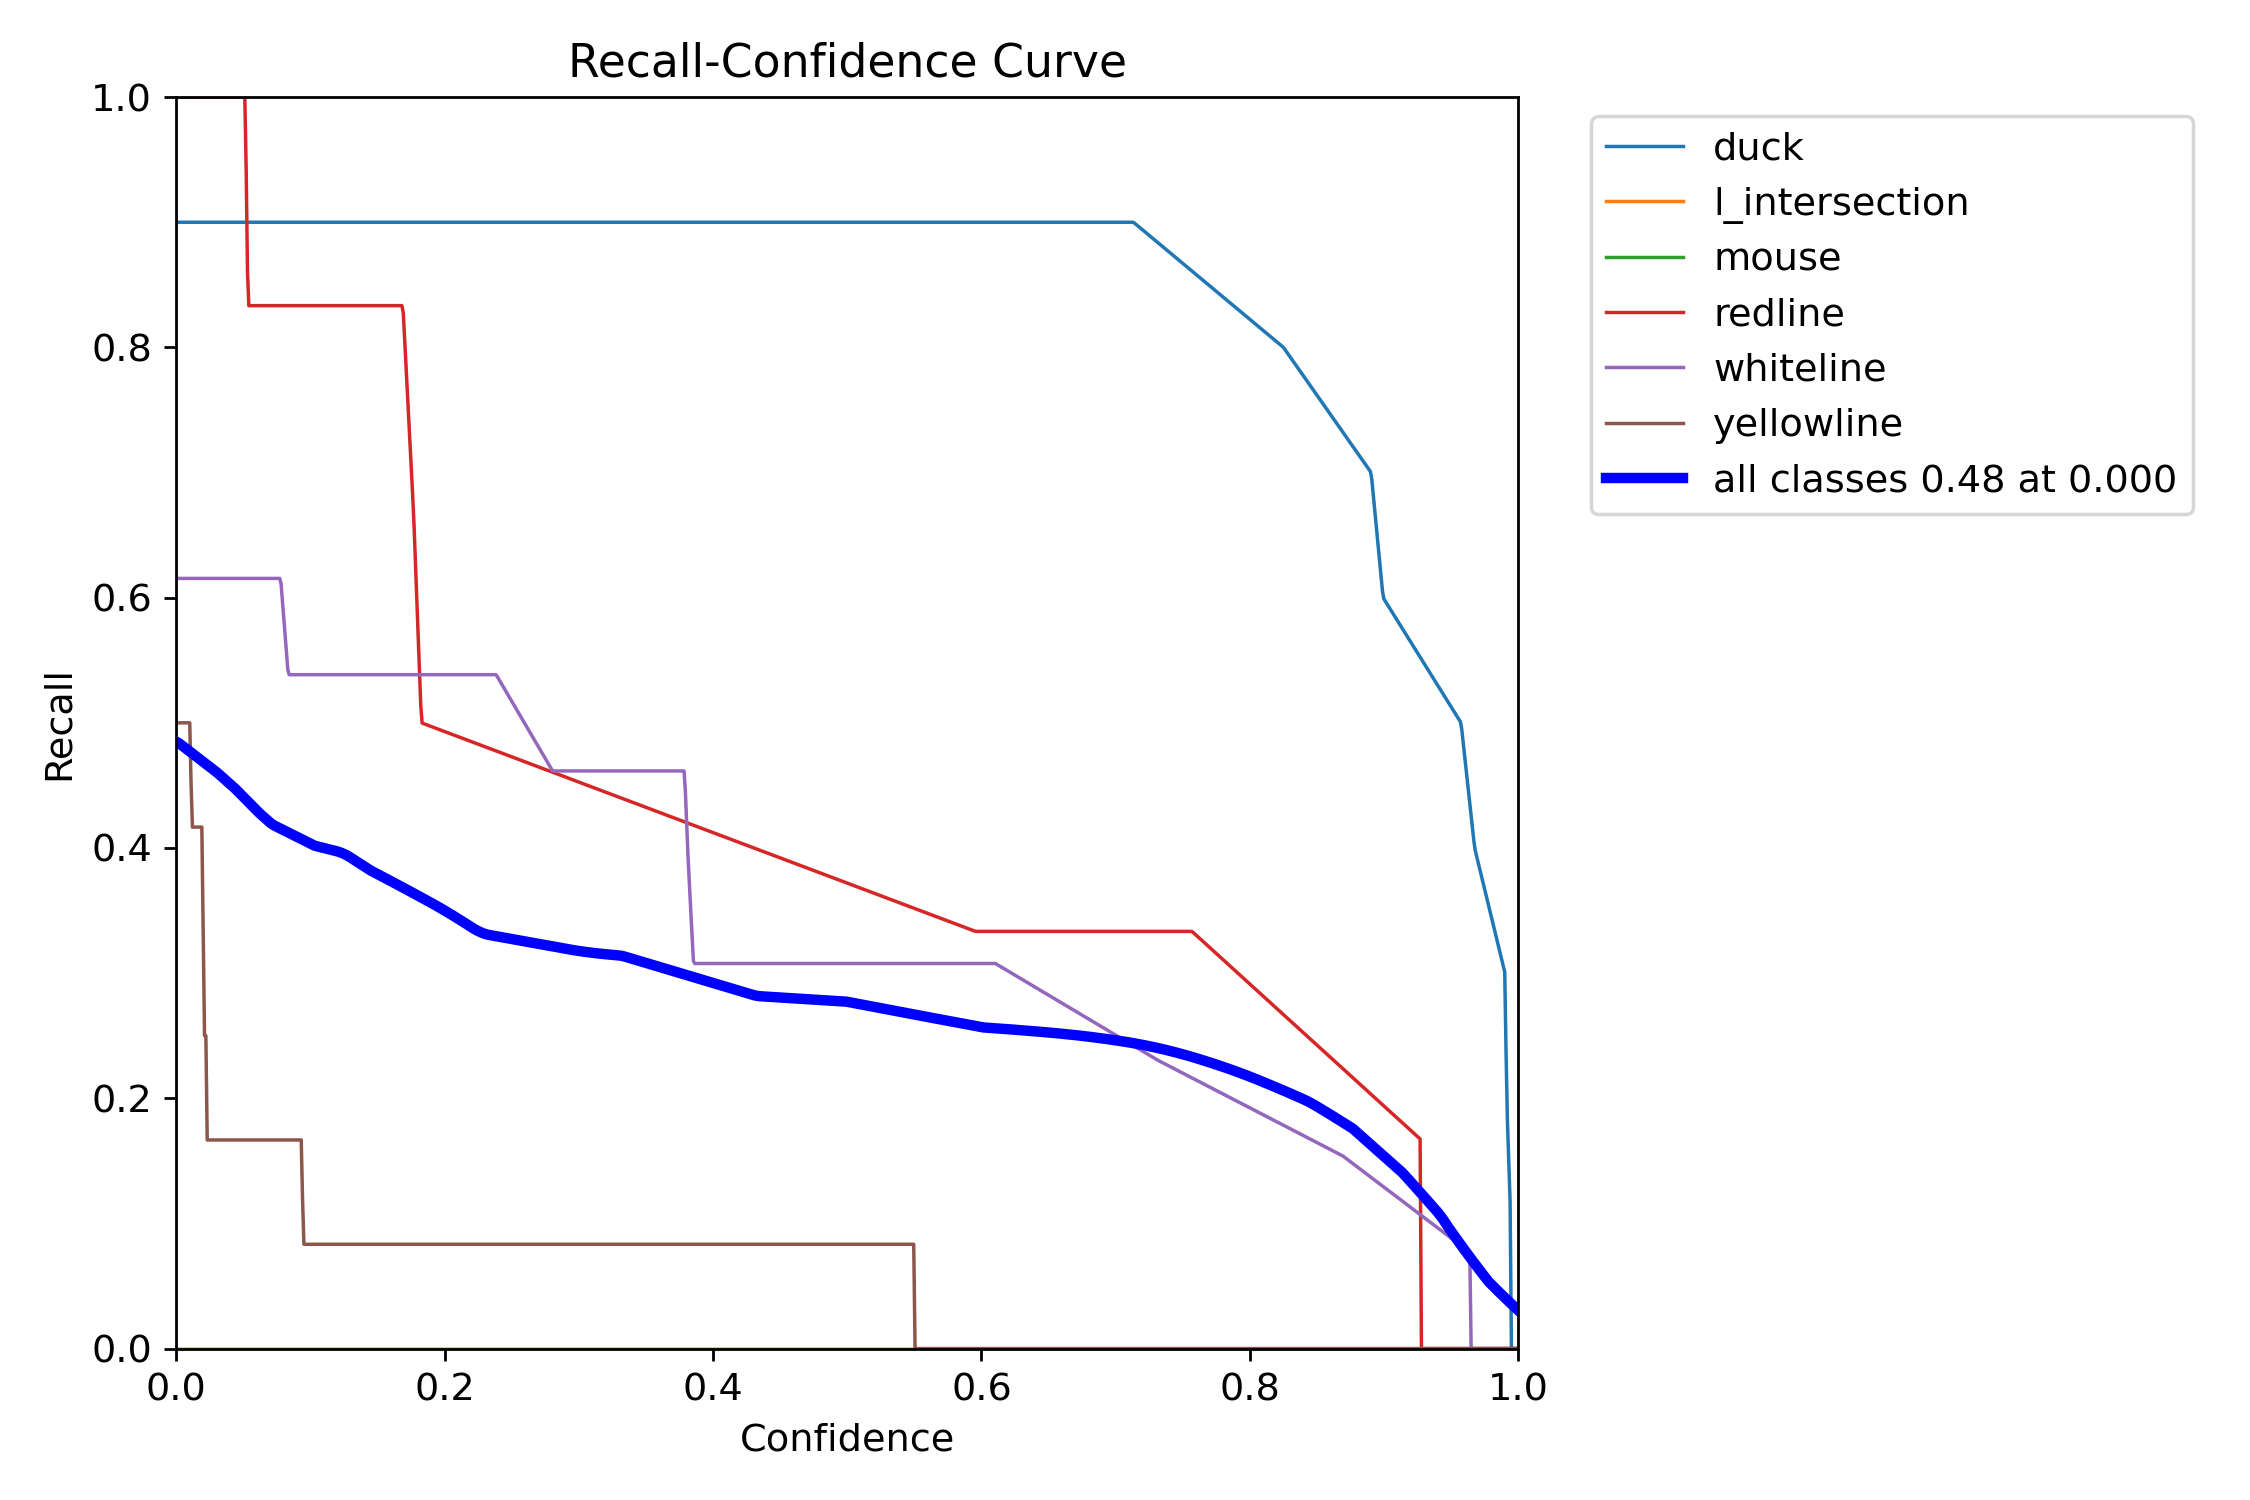

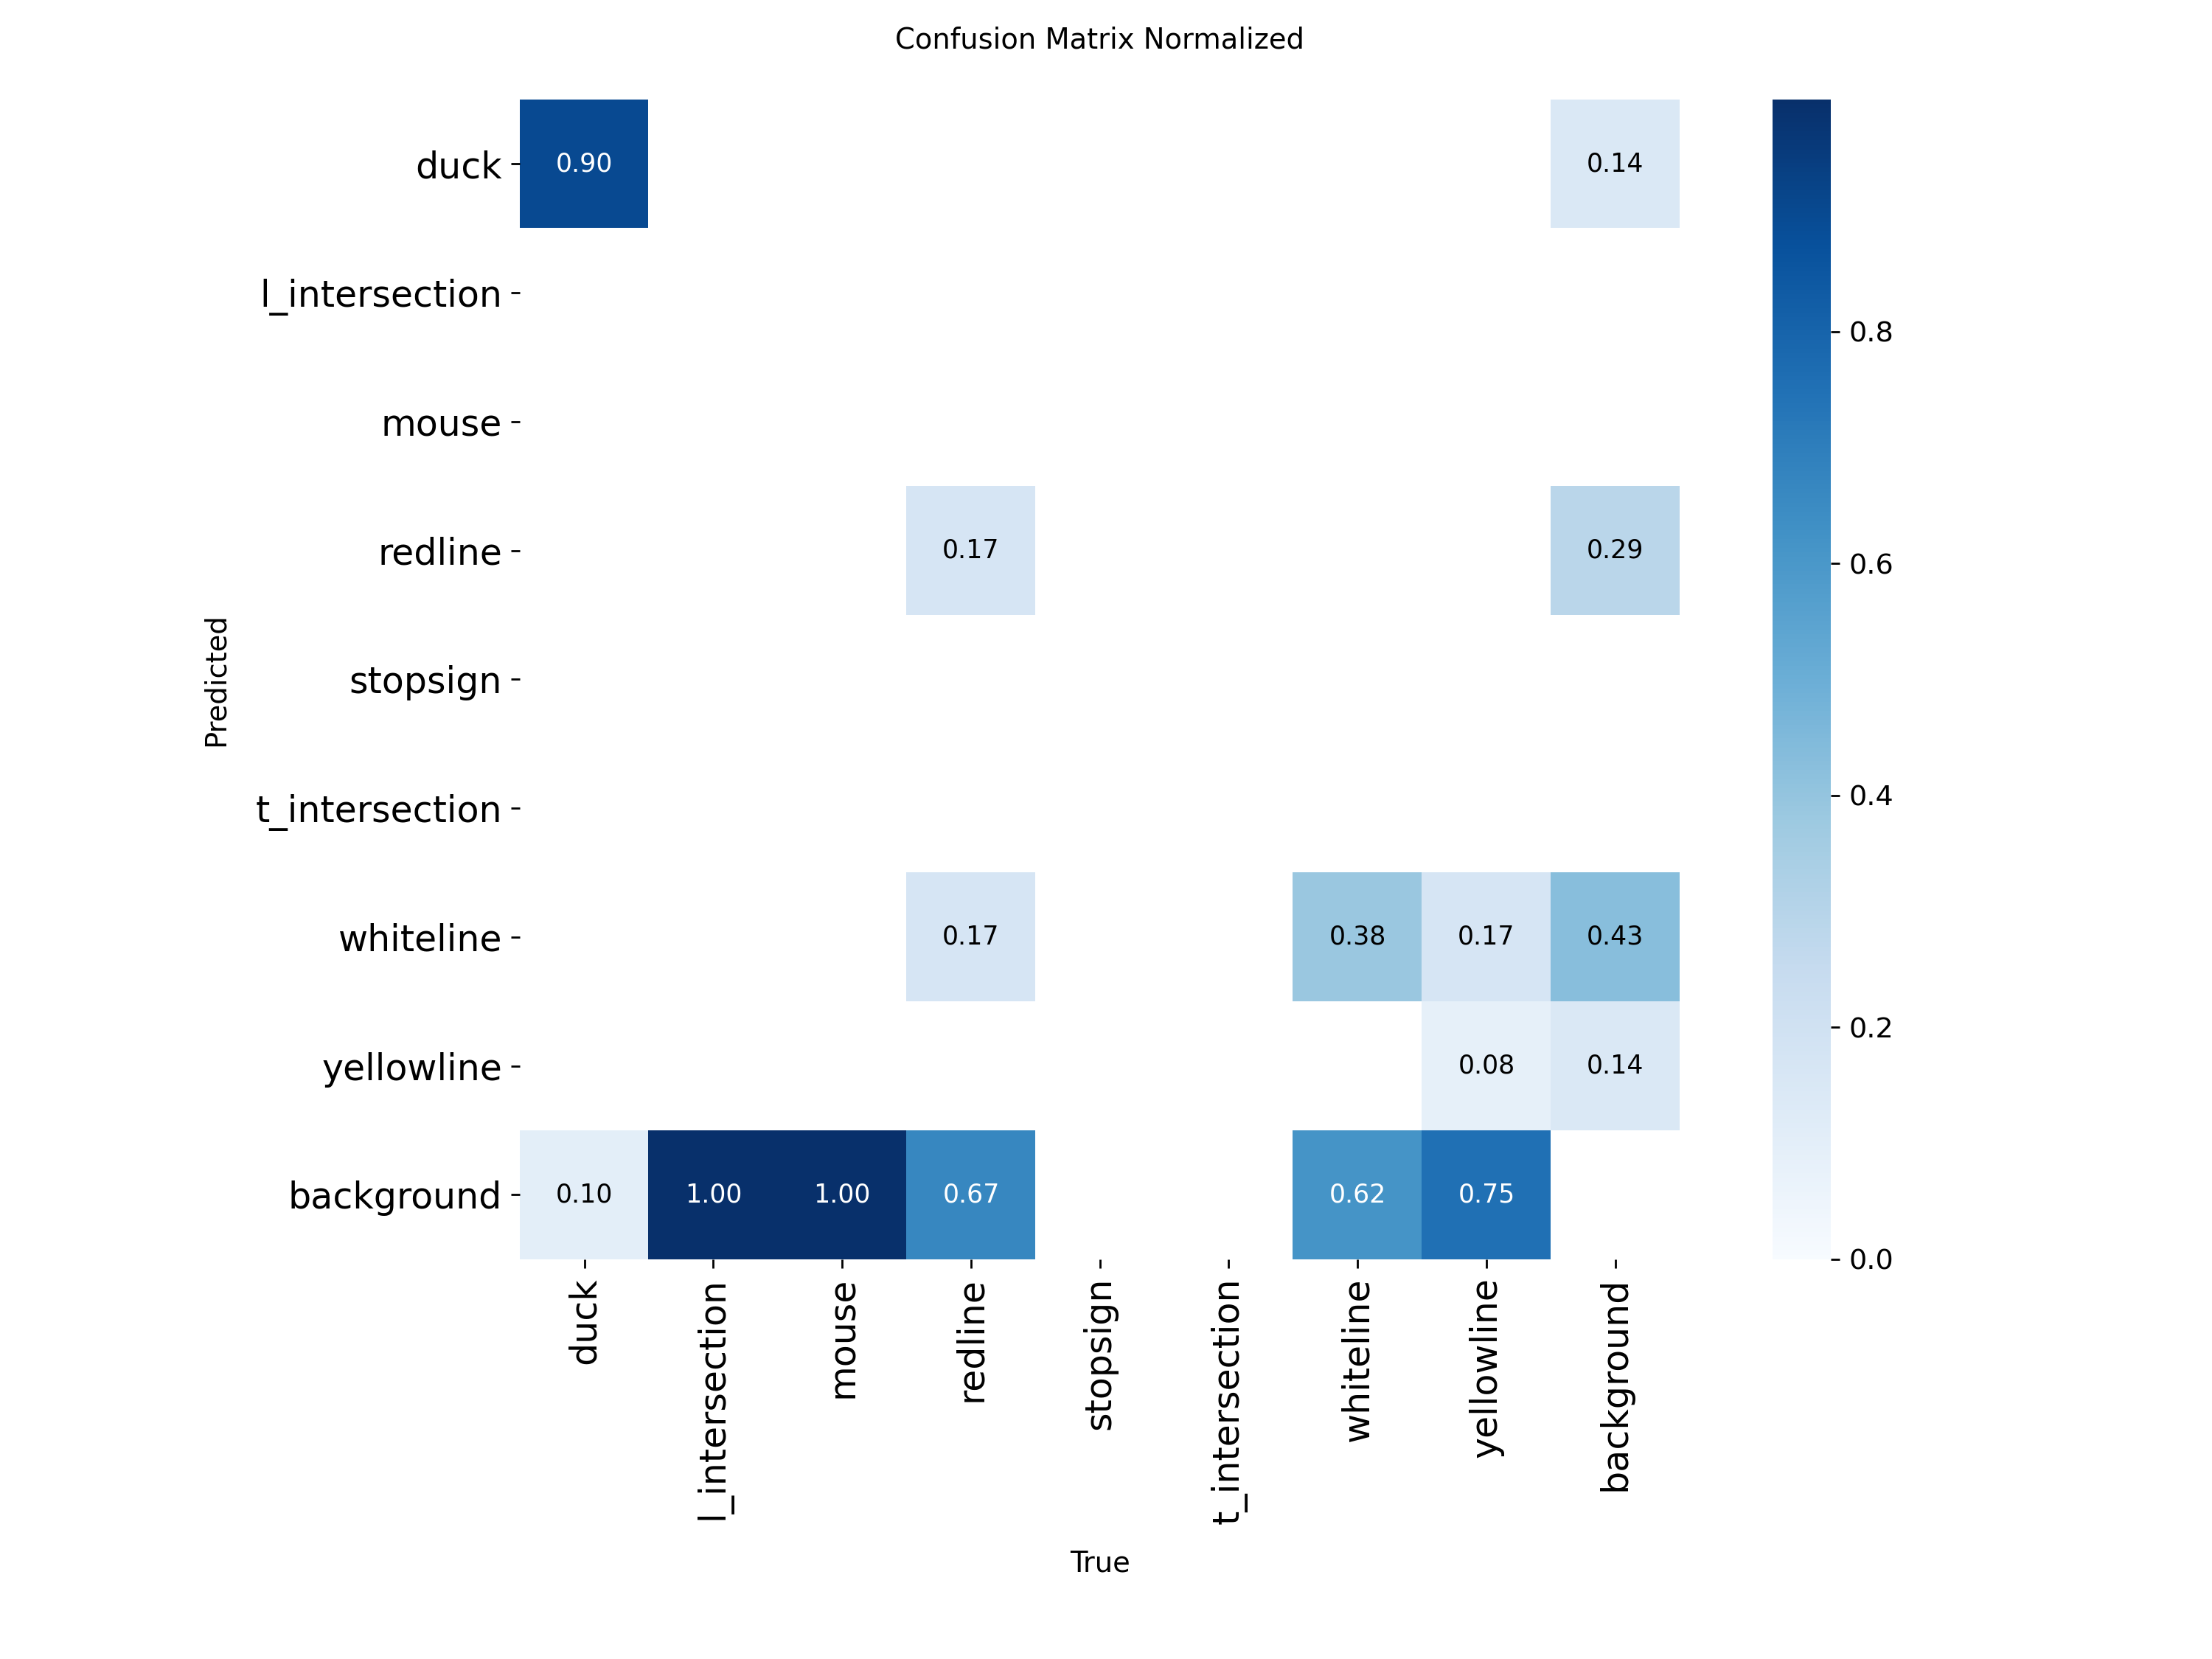

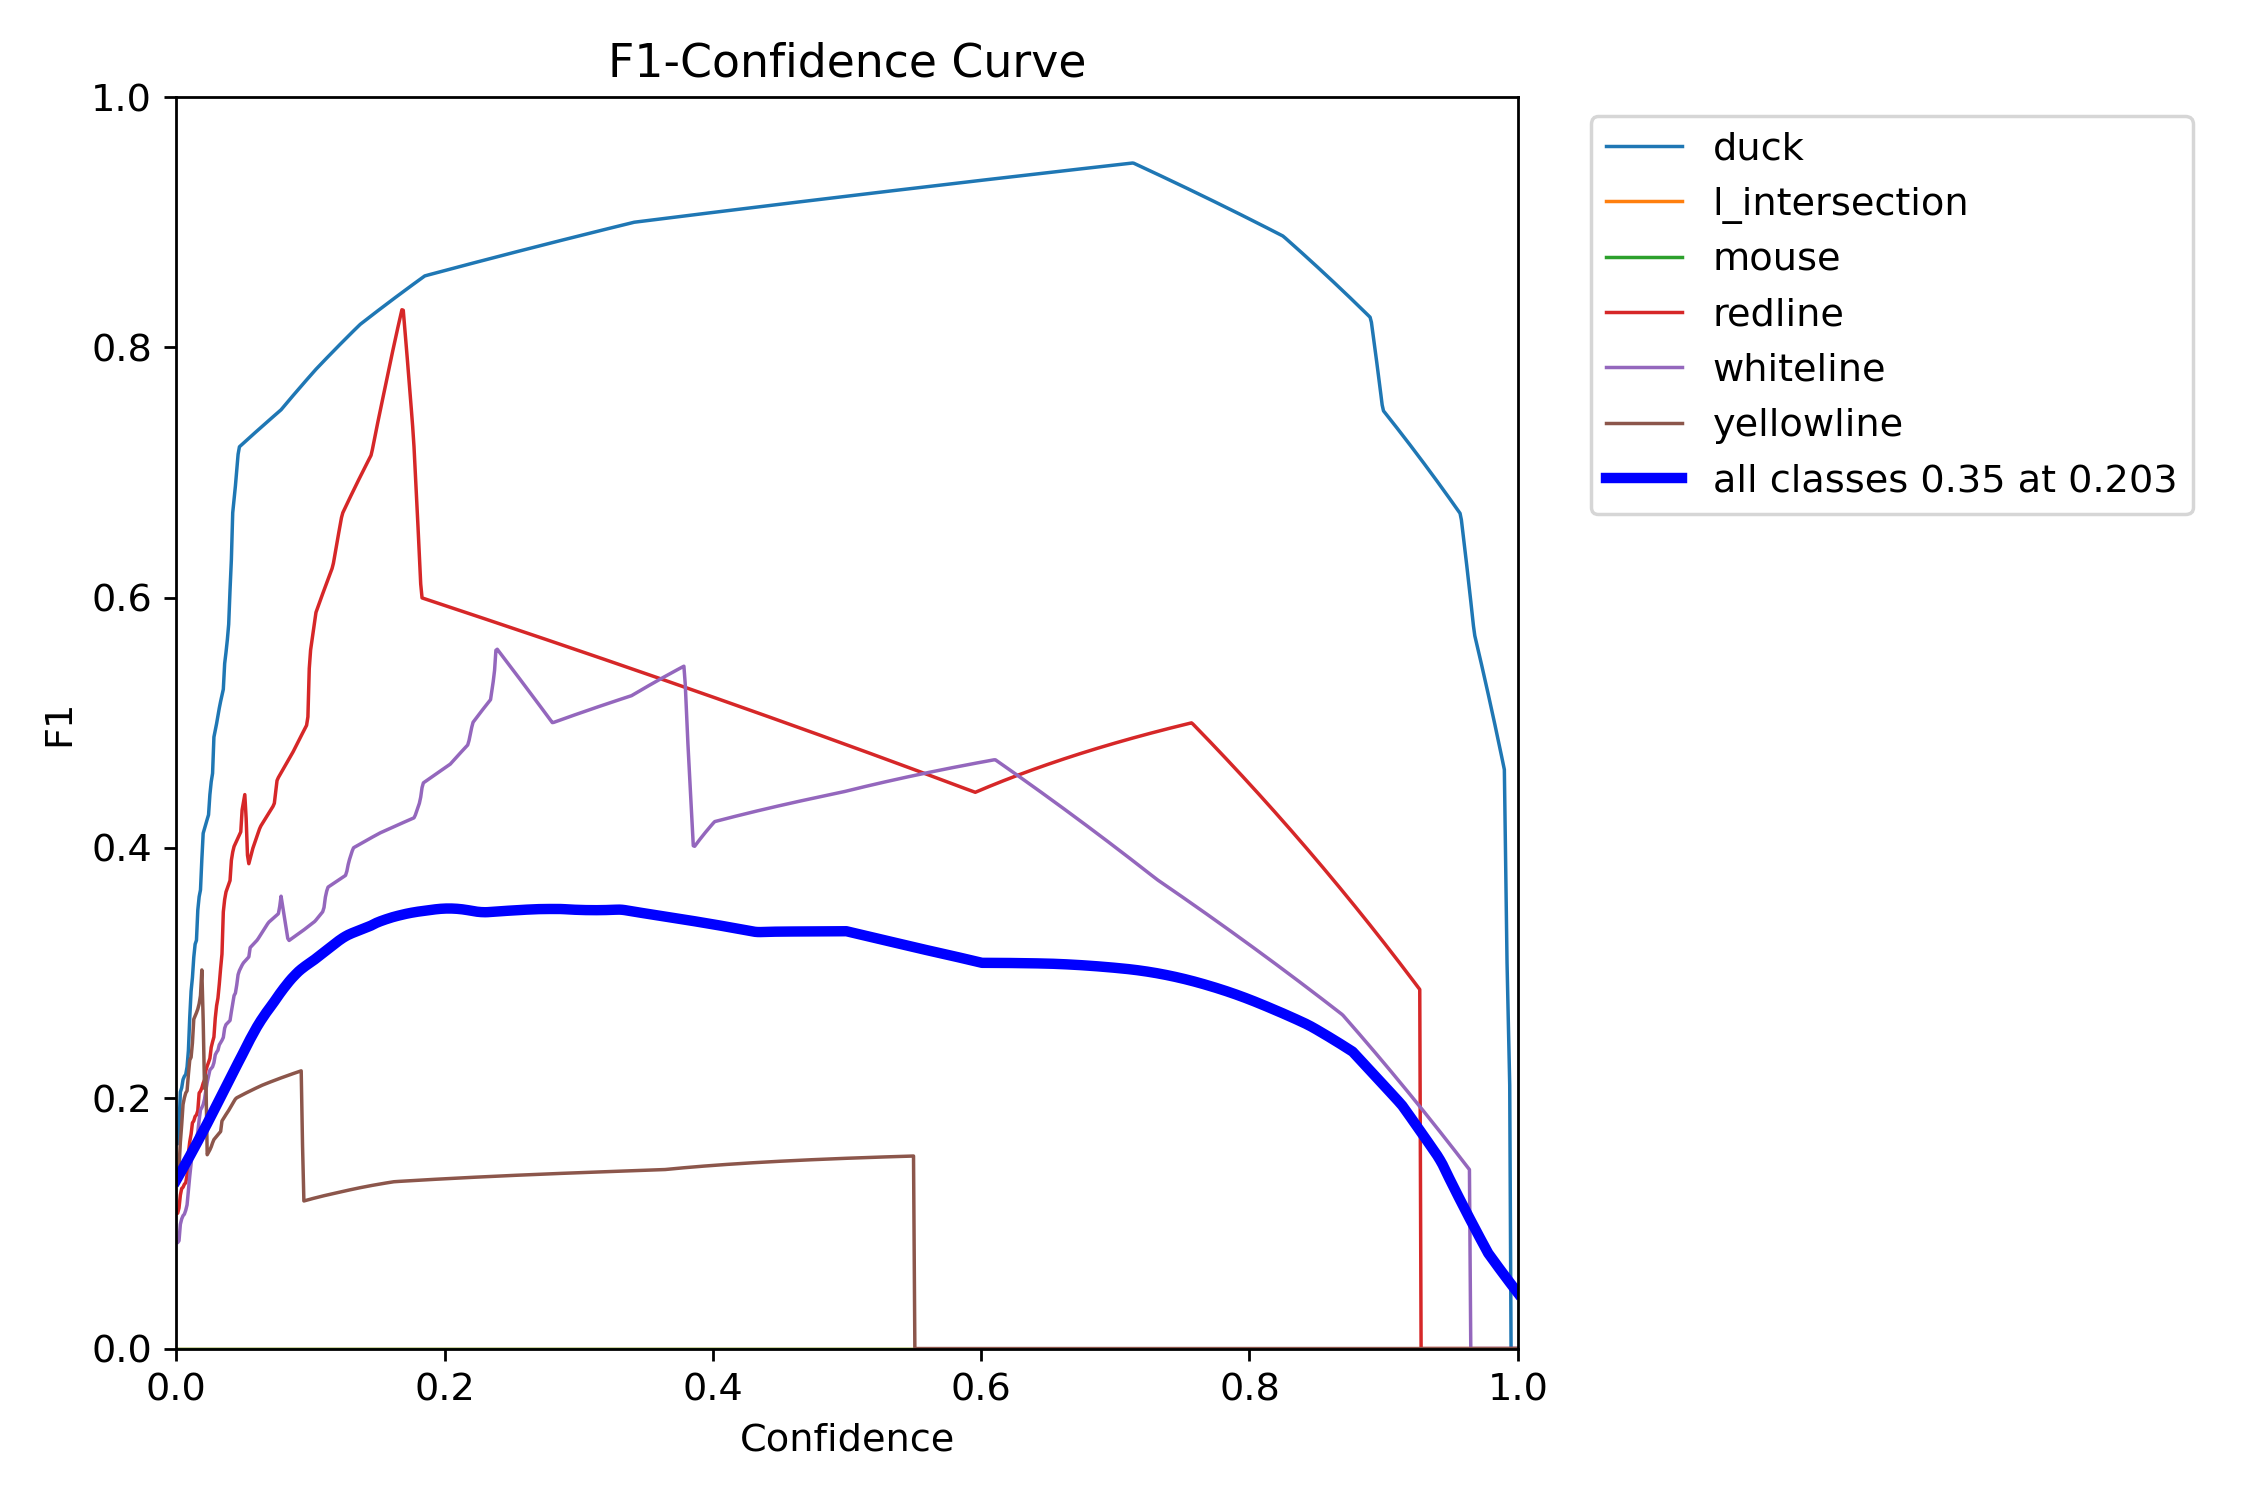

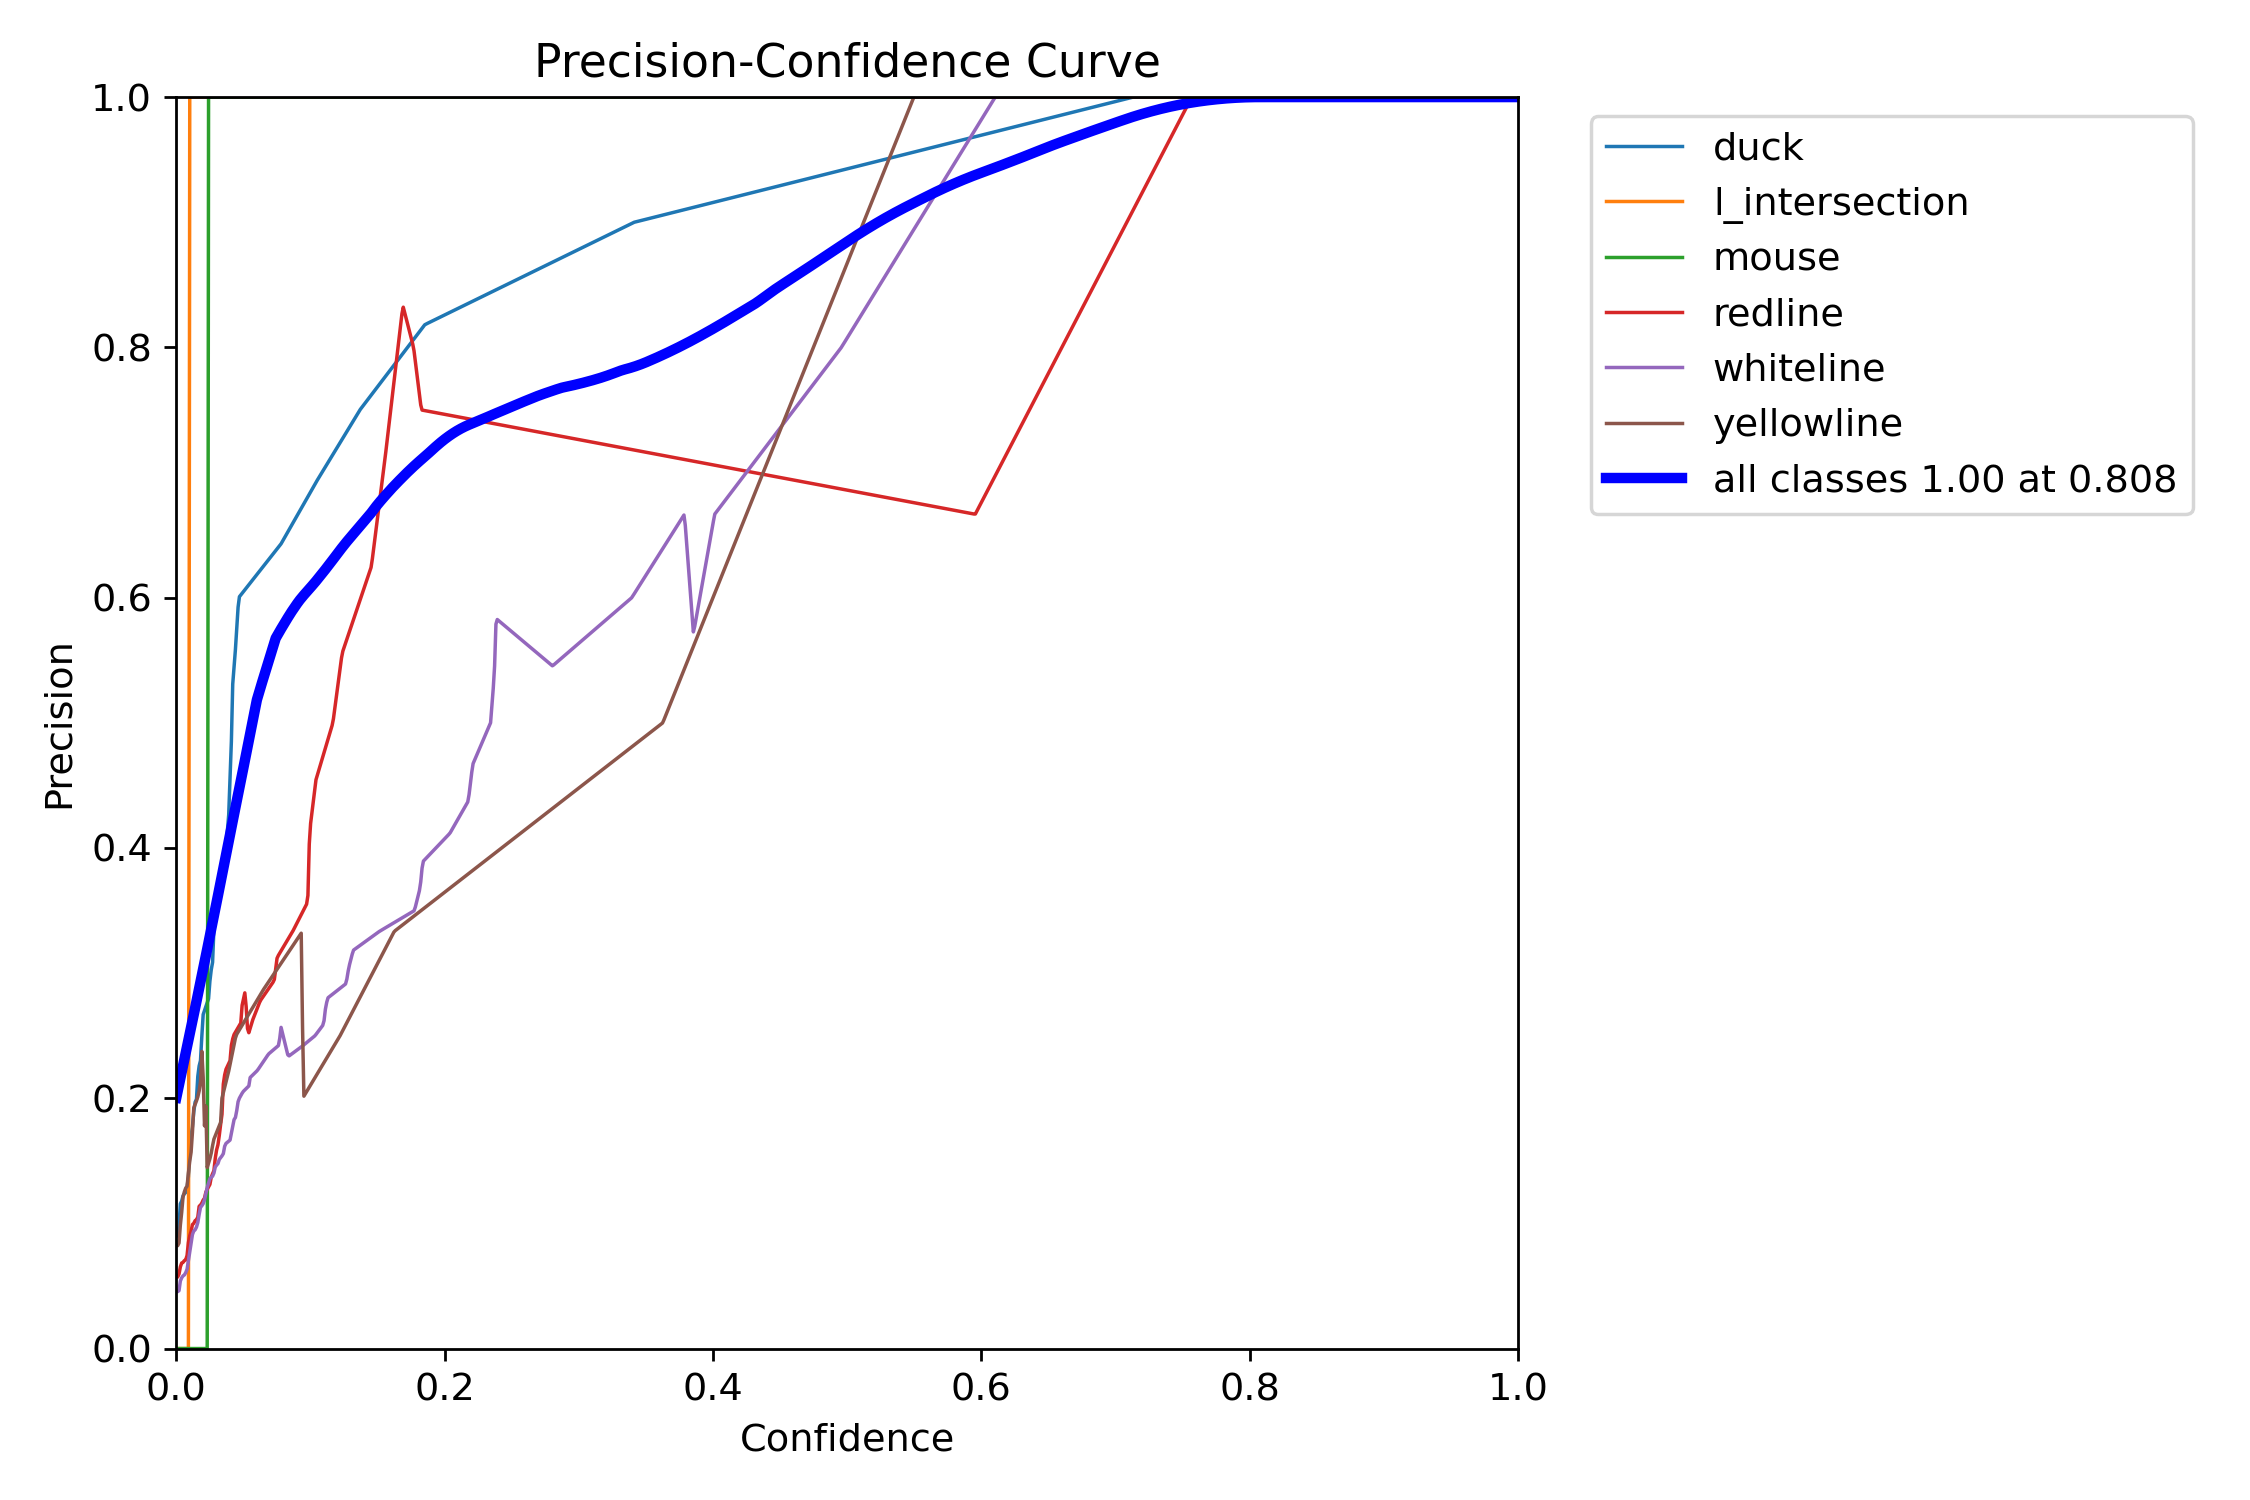

In [9]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/val/*.jpg') + glob.glob('/content/runs/detect/val/*.png'):
    display(Image(filename=image_path))

In [10]:
import shutil
import os

drive_path = '/content/drive/MyDrive/GooseBot/'

source_dirs = [
    '/content/runs/detect/train2',
    '/content/runs/detect/val',
    '/content/runs/detect/predict'
]

for source_dir in source_dirs:
    destination_dir = os.path.join(drive_path, os.path.basename(source_dir))
    if os.path.exists(destination_dir):
        print(f"Removing existing directory: {destination_dir}")
        shutil.rmtree(destination_dir)

    print(f"Copying {source_dir} to {destination_dir}")
    shutil.copytree(source_dir, destination_dir)
    print(f"Copied {source_dir} successfully.")

print("All results copied to Google Drive successfully!")

Copying /content/runs/detect/train2 to /content/drive/MyDrive/GooseBot/train2
Copied /content/runs/detect/train2 successfully.
Copying /content/runs/detect/val to /content/drive/MyDrive/GooseBot/val
Copied /content/runs/detect/val successfully.
Copying /content/runs/detect/predict to /content/drive/MyDrive/GooseBot/predict
Copied /content/runs/detect/predict successfully.
All results copied to Google Drive successfully!
